<a href="https://colab.research.google.com/github/janhavi-giri/Kaggle_exer_1/blob/main/Sentiment_Analysis_Classifier_Womens_clothing_kaggle_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Kaggle data topic: 
#E-commerce : Transactional data for predictive analysis: To build predictive models on online shopping portal data streams 
#Data sets: 1. https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews
#Contains: 23486 rows and 10 feature variables where each row corresponds to a customer review. 
#The 10 feature variables are:
#Clothing ID: Integer/Categorical variable
#Age: Positive integer variable of the reviewer’s age
#Title: String for review title
#Review Text: String variable for review body
#Rating: Positive integer, 1 worst to 5 best
#Recommended IND: Binary, 1 recommended, 0 not recommended
#Positive Feedback Count: Positive integer of # of customers who found the review helpful
#Division Name: Categorical name of the product high level division
#Department Name: Categorical name of the product department name.
#Class Name: Categorical name of the product class name.


# Building a Classifier predicting the recommendation through sentiment analysis of customer reviews 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')
pwd = os.getcwd()
print(pwd)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Step1: Explore and cleaning the data set
# Read the data from csv file
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
print("# of features in dataset are =", df.shape[1])
print("# of samples in dataset are =", df.shape[0])
#List name of features
print("Features of data set are =", df.columns)
#List datatypes of features
print("Feature datatypes are=",df.dtypes)
# Drop Unamed feature from dataset
df1 = df.drop(columns=['Unnamed: 0'])
#Updated features
print("Features of data set are =", df1.columns)

# of features in dataset are = 11
# of samples in dataset are = 23486
Features of data set are = Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')
Feature datatypes are= Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object
Features of data set are = Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')


In [ ]:
# Investigate the data set for any null values
for col in df1.columns.to_list():
    #print("Column", col, "NaN value count=", df1[col].isna().sum())
    if(df1[col].isna().sum()!=0):
        print("Column has null count=",col, df1[col].isna().sum(), "and their datatype is",df1[col].dtypes )
    

Column has null count= Title 3810 and their datatype is object
Column has null count= Review Text 845 and their datatype is object
Column has null count= Division Name 14 and their datatype is object
Column has null count= Department Name 14 and their datatype is object
Column has null count= Class Name 14 and their datatype is object


In [ ]:
# Since all are string type, will replace those null values with ''
for col in df1.columns.to_list():
    if(df1[col].isna().sum()!=0):
            df1[col] = df1[col].fillna('')
            print("After replacement", col, "NaN value count=",df1[col].isna().sum())

After replacement Title NaN value count= 0
After replacement Review Text NaN value count= 0
After replacement Division Name NaN value count= 0
After replacement Department Name NaN value count= 0
After replacement Class Name NaN value count= 0


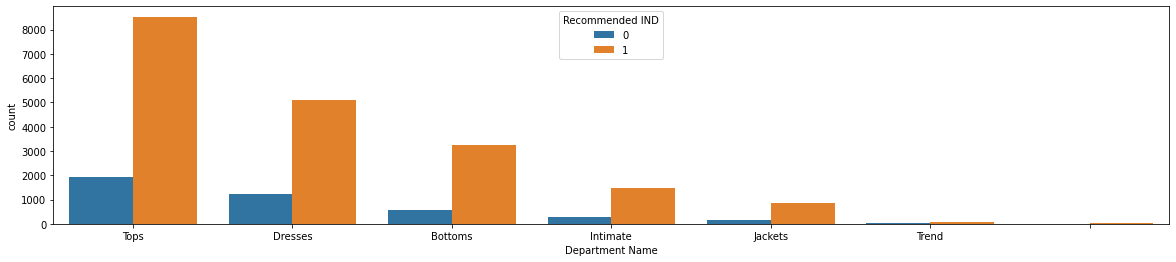

In [ ]:
plt.figure(figsize=(20, 4))
sns.countplot(data=df1, x='Department Name', order=df1['Department Name'].value_counts().sort_values(ascending=False).index, hue='Recommended IND')

In [ ]:
# Creating dataframe containing only the review text and corresponding recommendation
df2 = df1[['Recommended IND','Review Text']].copy()
print(df2.head())
df2.to_csv('Review_Analysis.csv')

   Recommended IND                                        Review Text
0                1  Absolutely wonderful - silky and sexy and comf...
1                1  Love this dress!  it's sooo pretty.  i happene...
2                0  I had such high hopes for this dress and reall...
3                1  I love, love, love this jumpsuit. it's fun, fl...
4                1  This shirt is very flattering to all due to th...


In [ ]:
import regex as re

In [ ]:
# JG: removing special characters from review text
def remove_special_characters(text, remove_digits=True):
  pattern=r'[^a-zA-z0-9\s]'
  text=re.sub(pattern,'',text) 
  return text

In [ ]:
df2['Review Text']=df2['Review Text'].apply(remove_special_characters)
df2.head()

,Recommended IND,Review Text
0,1,Absolutely wonderful silky and sexy and comfo...
1,1,Love this dress its sooo pretty i happened t...
2,0,I had such high hopes for this dress and reall...
3,1,I love love love this jumpsuit its fun flirty ...
4,1,This shirt is very flattering to all due to th...


(16440,) (7046,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


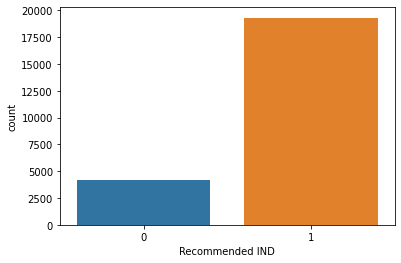

In [ ]:
#JG: Splitting into train/test data
X=df2['Review Text'].values
Y=df2['Recommended IND'].values
import seaborn as sns
sns.countplot(df2['Recommended IND'])
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape)

Conducting Sentiment Analysis: From reviews predicting the recommendation 

Reference code: https://github.com/abr-98/text_classification_all_network/blob/master/Text_classification__sentiment_analysis.ipynb

Used the TF-IDF algorithm to convert the review text to numeric form which will be used to make prediction 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
vec.fit(X_train)
print("# of unique features=",len(vec.get_feature_names()))

x_train=vec.transform(X_train)
x_test=vec.transform(X_test)


# of unique features= 16075


In [ ]:
x_train

<16440x16075 sparse matrix of type '<class 'numpy.float64'>'
	with 682859 stored elements in Compressed Sparse Row format>

In [ ]:
x_test

<7046x16075 sparse matrix of type '<class 'numpy.float64'>'
	with 288614 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
score_test = lr.score(x_test, Y_test)

In [ ]:
score_test

0.8868861765540732

In [ ]:
score_train = lr.score(x_train, Y_train)

In [ ]:
score_train

0.9087591240875912

In [ ]:
y_pred = lr.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score

### START CODE HERE ###
# TPOT confusion matrix
cmtp = confusion_matrix(Y_test, y_pred) 
acc  = accuracy(Y_test,y_pred)
rec  = recall(Y_test,y_pred)
prec = precision(Y_test,y_pred)
f1   = f1_score(Y_test,y_pred)
### END CODE HERE ###
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmtp)

Accuracy = 0.8868861765540732, Precision = 0.8987058635564786, Recall = 0.9718382861091914, F1-score = 0.9338424504025898
Confusion Matrix is:
[[ 624  634]
 [ 163 5625]]
